# Description

In this notebook, I will read and explore the dataset

In [1]:
import os 
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
PATH_FOLDER_DATA = "/home/thaiv7/Desktop/python-project/scientific_paper/dataset/data"
if not os.path.exists(PATH_FOLDER_DATA):
    os.makedirs(PATH_FOLDER_DATA)

PATH_FILE_CRAW_DATA = os.path.join(PATH_FOLDER_DATA, "arxiv-metadata-oai-snapshot.json")

PATH_FILE_PROCESSED = os.path.join(PATH_FOLDER_DATA, "arxiv_metadata_filtered.parquet")

LIST_CS_CATEGORIES= [
    'cs.AI', 'cs.AR', 'cs.CC', 'cs.CE', 'cs.CG', 'cs.CL', 'cs.CV',
    'cs.CR', 'cs.CY', 'cs.DB', 'cs.DC', 'cs.DL', 'cs.DM', 'cs.DS',
    'cs.ET', 'cs.FL', 'cs.GL', 'cs.GR', 'cs.GT', 'cs.HC',
    'cs.IR', 'cs.IT', 'cs.LG', 'cs.LO', 'cs.MA',
    'cs.MM', 'cs.MS', 'cs.NA', 'cs.NE', 'cs.NI', 'cs.OH', 'cs.OS',
    'cs.PF', 'cs.PL', 'cs.RO', 'cs.SC', 'cs.SD',
    'cs.SE', 'cs.SI', 'cs.SY'
]

In [17]:
with open(PATH_FILE_CRAW_DATA, 'r') as file:
    data = file.readlines()
    
print(f"Total number of lines in the file: {len(data)}")
print(f"Type of data: {type(data)}")

Total number of lines in the file: 2787058
Type of data: <class 'list'>


Load sample data

In [18]:
idx = np.random.randint(0, len(data))

sample = data[idx]
sample = json.loads(sample) 
category = sample.get('categories', '')
print(f"Category of the sample: {category}") 
print(f"Sample data:")
sample

Category of the sample: cond-mat.soft
Sample data:


{'id': '1803.10636',
 'submitter': 'Sylvain Deville',
 'authors': "J\\'er\\'emy Dhainaut, Giulia Piana, Sylvain Deville, Christian Guizard,\n  and Michaela Klotz",
 'title': 'Freezing-induced ordering of block copolymer micelles',
 'comments': '7 pages, 4 figures',
 'journal-ref': 'Chem. Commun., 2014, 50, 12572-12574',
 'doi': '10.1039/C4CC05556J',
 'report-no': None,
 'categories': 'cond-mat.soft',
 'license': 'http://arxiv.org/licenses/nonexclusive-distrib/1.0/',
 'abstract': '  We demonstrate here the ordering of block copolymer micelles by ice\ntemplating, below 0 {\\deg}C. We used this for the preparation of silica\nmonoliths that present an ice-templated macroporosity, combined with a 2D\nhexagonal mesostructure templated by the addition of P123. We propose a\nmechanism triggered by the progressive freezing-induced concentration.\n',
 'versions': [{'version': 'v1', 'created': 'Wed, 28 Mar 2018 14:14:14 GMT'}],
 'update_date': '2018-03-29',
 'authors_parsed': [['Dhainaut', 'Jérém

# 1. Read data and save to parquet file

In [19]:
data_df = []

for idx in range(len(data)):
    sample = data[idx]
    sample = json.loads(sample)  

    list_categories = sample.get('categories', '').split(' ')

    if all(cat in LIST_CS_CATEGORIES for cat in list_categories):
        data_df.append(sample)
    
data_df = pd.DataFrame(data_df)
print(f"Shape of the DataFrame: {data_df.shape}")
data_df.sample()

Shape of the DataFrame: (491159, 14)


,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
187759,2104.04412,Francesco Moramarco,"Francesco Moramarco, Damir Juric, Aleksandar S...",Towards objectively evaluating the quality of ...,None,None,None,None,cs.CL,http://arxiv.org/licenses/nonexclusive-distrib...,We propose a method for evaluating the quali...,"[{'version': 'v1', 'created': 'Fri, 9 Apr 2021...",2021-04-12,"[[Moramarco, Francesco, ], [Juric, Damir, ], [..."


# 2. Process data

In [20]:
SELECTED_COLUMNS = ['id', 'submitter', 'authors', 'title', 
                    'journal-ref', 'categories', 'abstract', 'update_date']

data_df = data_df[SELECTED_COLUMNS]
print(f"Shape of the DataFrame after selecting columns: {data_df.shape}")
data_df.sample()

Shape of the DataFrame after selecting columns: (491159, 8)


,id,submitter,authors,title,journal-ref,categories,abstract,update_date
283543,2303.05206,Yi-Rui Yang,"Yi-Rui Yang, Kun Wang, Wu-Jun Li","FedREP: A Byzantine-Robust, Communication-Effi...",None,cs.LG cs.CR cs.DC,Federated learning (FL) has recently become ...,2023-03-10


In [21]:
def construct_arvix_paper_url(paper_id):
    base_url = "https://arxiv.org/abs/"
    return f"{base_url}{paper_id}"

In [22]:
data_df['paper_url'] = data_df['id'].apply(construct_arvix_paper_url)
print(f"Shape of the DataFrame after selecting columns: {data_df.shape}")
data_df.sample()

Shape of the DataFrame after selecting columns: (491159, 9)


,id,submitter,authors,title,journal-ref,categories,abstract,update_date,paper_url
123100,1905.10425,Nikita Nangia,Nikita Nangia and Samuel R. Bowman,Human vs. Muppet: A Conservative Estimate of H...,ACL 2019,cs.CL cs.AI,"The GLUE benchmark (Wang et al., 2019b) is a...",2019-06-04,https://arxiv.org/abs/1905.10425


In [23]:
test_author_name = 'Thai-Vu Nguyen'
data_df[data_df['submitter'] == test_author_name]

,id,submitter,authors,title,journal-ref,categories,abstract,update_date,paper_url
210682,2109.13016,Thai-Vu Nguyen,"Thai-Vu Nguyen, Anh Nguyen, Nghia Le, Bac Le",Semi-Supervised Adversarial Discriminative Dom...,None,cs.CV cs.LG,Domain adaptation is a potential method to t...,2022-10-20,https://arxiv.org/abs/2109.13016


# 3. Explore data

In [24]:
list_categories = data_df['categories'].apply(lambda x: x.split(' '))
unique_categories = set(list_categories.explode())
print(f"Unique categories found: {unique_categories}")

Unique categories found: {'cs.IR', 'cs.DM', 'cs.CR', 'cs.NI', 'cs.PL', 'cs.RO', 'cs.LG', 'cs.AI', 'cs.CY', 'cs.AR', 'cs.SD', 'cs.CC', 'cs.PF', 'cs.SC', 'cs.DC', 'cs.MA', 'cs.SE', 'cs.NE', 'cs.ET', 'cs.CV', 'cs.MS', 'cs.OS', 'cs.CG', 'cs.CE', 'cs.DL', 'cs.GR', 'cs.SI', 'cs.LO', 'cs.FL', 'cs.GL', 'cs.SY', 'cs.NA', 'cs.OH', 'cs.CL', 'cs.DB', 'cs.DS', 'cs.GT', 'cs.MM', 'cs.HC'}


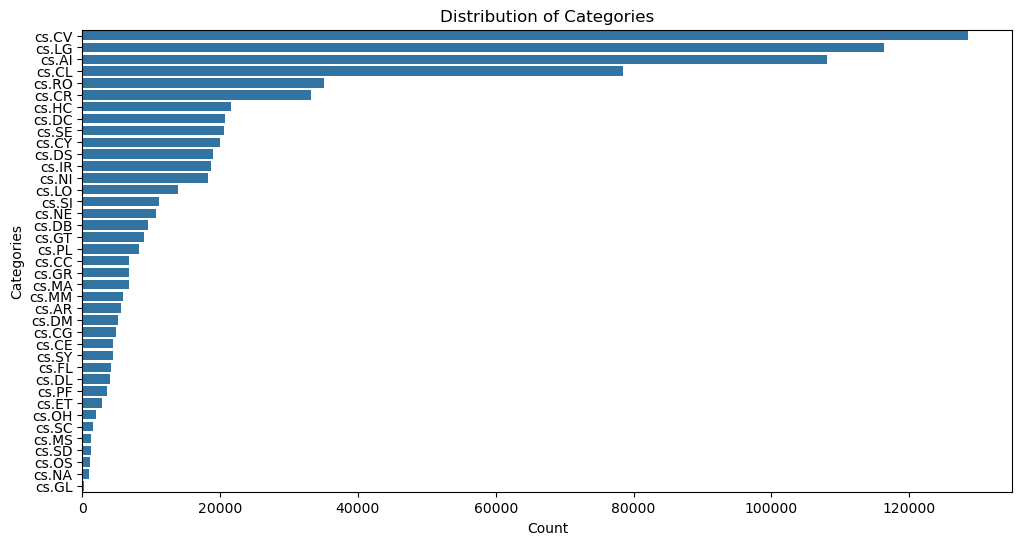

In [25]:
# visualize number of categories

plt.figure(figsize=(12, 6))
sns.countplot(y=list_categories.explode(), order=list_categories.explode().value_counts().index)
plt.title('Distribution of Categories')
plt.xlabel('Count')
plt.ylabel('Categories')
plt.show()

In [26]:
# Save the processed DataFrame
data_df.to_parquet(PATH_FILE_PROCESSED, index=False)
print("Processed data saved to Parquet format.")

Processed data saved to Parquet format.
